# illustration of how the average can hide diverging samples

- The algorithm here starts with a "seed" value of either -1 or 1. At each step/iteration, it adds the seed value to itself.  
- Note that the added value is multiplied by a value between -1 to 5 so that there is some variation between each addition.  
- The effect is that a value that starts at 1 will almost always increase in *positive* value with each step, while a value that starts at -1 will almost always increase in *negative* value with each step. Since there is roughly equal proportions of -1 and 1 the effect is to create two diverging sets of samples heading towards positive and negative infinity with increasing steps.  
- But we can take the mean value of all samples at each step and we find that the mean value stays close to zero! Here we see how the mean does not summarise our data in a useful way.

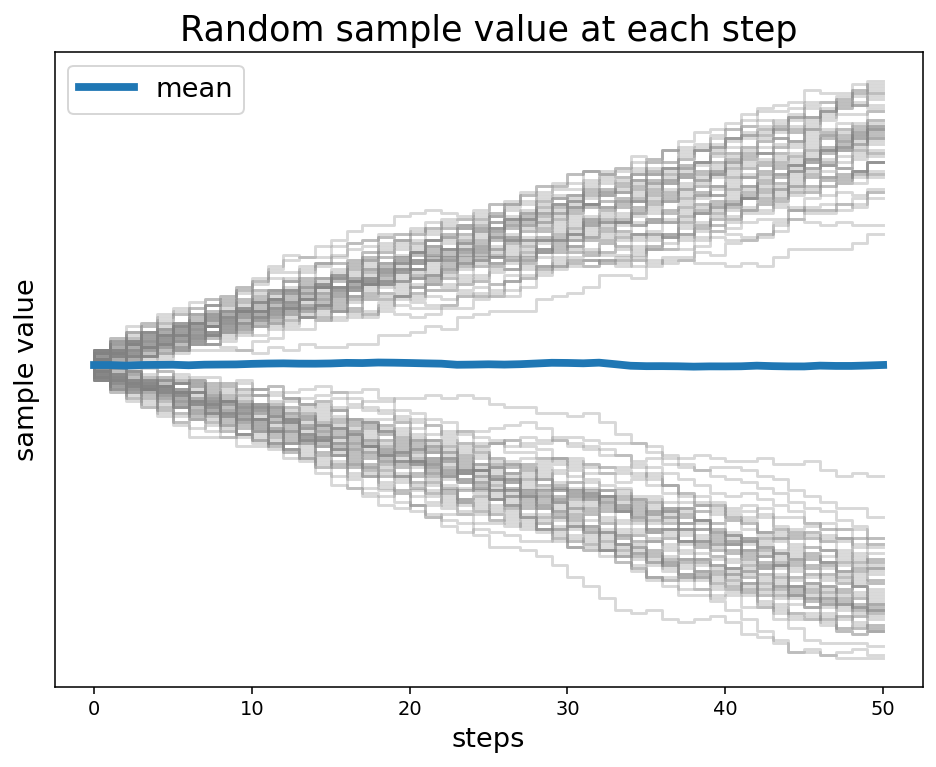

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

steps = 50 #number of iterations of the algorithm
samples = 100 #number of samples we will iterate through
#results list which is initialised with a set of random -1 and 1 "seeds"
res = [[np.random.choice([-1,1])] for x in range(samples)]
#setup a list for the mean, which we calculate for the "seed" values chosen
mean_at_each_step = [np.mean([x[0] for x in res])]
#first for loop controls the number of iterations/steps
for counter in range(steps):
    #iterate through each row in the res list
    for row in res:
        row.append(
            #add seed to last value in row, but multiple the seed by a random multiplier to add in randomness
            row[-1] + row[0]*np.random.randint(-1,5)
        )
    #calculate average across all rows at this step
    mean_at_each_step.append(
        np.mean([x[-1] for x in res])
    )

#plot each line as a step function and show
steps_index = [x for x in range(steps+1)]
plt.rcParams['figure.figsize'] = [8.0, 6]
plt.rcParams['figure.dpi'] = 140
for row in res:
    plt.step(steps_index,row, alpha=0.3, color = "grey")
#plot the mean
plt.plot(steps_index, mean_at_each_step, label="mean", linewidth = 4)
plt.xlabel("steps", fontsize=14)
plt.ylabel("sample value", fontsize=14)
plt.yticks(ticks=[])
plt.legend(fontsize=14)
plt.title("Random sample value at each step", fontsize=18)
plt.savefig("averages_diverging.png", facecolor='white', transparent=False)
plt.show()